In [1]:
#import required libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
categories = pd.read_csv("categories.csv")
categories.head()

,category_name,category_id
0,PC - Headsets / Headphones,0
1,Accessories - PS2,1
2,Accessories - PS3,2
3,Accessories - PS4,3
4,Accessories - PSP,4


In [3]:
sales_train = pd.read_csv("sales_train.csv")
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [4]:
sales_train.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


In [5]:
sales_train.loc[sales_train.item_cnt_day < 0, 'item_cnt_day'] = 0
sales_train.loc[sales_train.item_price < 0, 'item_price'] = 0
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,0.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [6]:
test = pd.read_csv("test.csv")
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [7]:
shops= pd.read_csv("shops.csv")
shops.head()

,shop_name,shop_id
0,"! Yakutsk Ordzhonikidze, 56 francs",0
1,"! Yakutsk TC ""Central"" fran",1
2,"Adygea TC ""Mega""",2
3,"Balashikha TC ""Oktyabr-Kinomir""",3
4,"Volga TC ""Volga Mall""",4


In [8]:
items= pd.read_csv("items.csv")
items.head()

,item_id,category_id,item_name
0,0,40,!! IN THE POWER OF HAPPINESS (PLAST) D
1,1,76,! ABBYY FineReader 12 Professional Edition Ful...
2,2,40,*** IN THE GLORY OF THE GLORY (UNV) D
3,3,40,*** BLUE WAVE (Univ) D
4,4,40,*** BOX (GLASS) D


In [9]:
sales_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


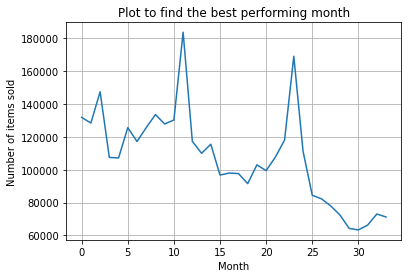

In [10]:
df_sales=sales_train.groupby('date_block_num').agg(sales_count=('item_cnt_day', 'sum'))
plt.grid("white")
plot1 = plt.plot(df_sales)
plt.xlabel("Month")
plt.ylabel("Number of items sold")
plt.title("Plot to find the best performing month")
plt.show()

Observation 1 : December of 2013 saw the highest number of items sold followed by December 2014.

-----

In [12]:
df_cat = pd.merge(sales_train,items,on='item_id',how="left")
df_cat.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,category_id,item_name
0,02.01.2013,0,59,22154,999.00,1.0,37,SCENE 2012 (BD)
1,03.01.2013,0,25,2552,899.00,1.0,58,DEEP PURPLE The House Of Blue Light LP
2,05.01.2013,0,25,2552,899.00,0.0,58,DEEP PURPLE The House Of Blue Light LP
3,06.01.2013,0,25,2554,1709.05,1.0,58,DEEP PURPLE Who Do You Think We Are LP
4,15.01.2013,0,25,2555,1099.00,1.0,56,DEEP PURPLE 30 Very Best Of 2CD (Businesses).


In [13]:
df_cat.nunique()

date               1034
date_block_num       34
shop_id              60
item_id           21807
item_price        19993
item_cnt_day        190
category_id          84
item_name         21788
dtype: int64

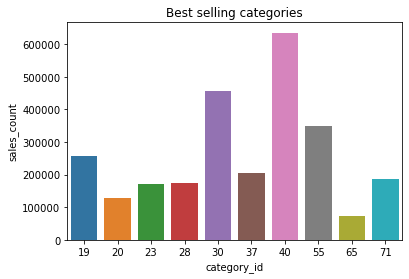

In [17]:
df_cats=df_cat.groupby('category_id').agg(sales_count=('item_cnt_day', 'sum')).reset_index().sort_values(by='sales_count', ascending=False).head(10)
ax = sns.barplot(y='sales_count', x='category_id', data=df_cats)
plt.title("Best selling categories")
plt.show()

Observation 2 : Categories with ID 40, 30 and 55 were the top 3 best selling categories.

---

In [123]:
df_m = df_cat.groupby('date_block_num')['item_cnt_day'].max()
df_m.reset_index().head()

,date_block_num,item_cnt_day
0,0,64.0
1,1,53.0
2,2,88.0
3,3,50.0
4,4,80.0


In [121]:
df_m2 = pd.merge(df_m,df_cat,left_on=['date_block_num','item_cnt_day'], right_on=['date_block_num','item_cnt_day'])
df_m2.head()

,date_block_num,item_cnt_day,date,shop_id,item_id,item_price,category_id,item_name
0,0,64.0,02.01.2013,31,13598,10.000000,71,"Kraft package ""Interesting gifts""-orange"
1,1,53.0,05.02.2013,42,2749,1070.698113,28,"Dead Space 3 Limited Edition [PC, Russian subt..."
2,2,88.0,12.03.2013,31,6738,699.000000,30,"StarCraft II: Heart of the Swarm (add-on) [PC,..."
3,3,50.0,29.04.2013,12,2808,999.000000,30,"Diablo III [PC, Jewel, Russian version]"
4,4,80.0,17.05.2013,31,15044,699.000000,30,"Metro. Ray of hope. Limited edition [PC, Russi..."


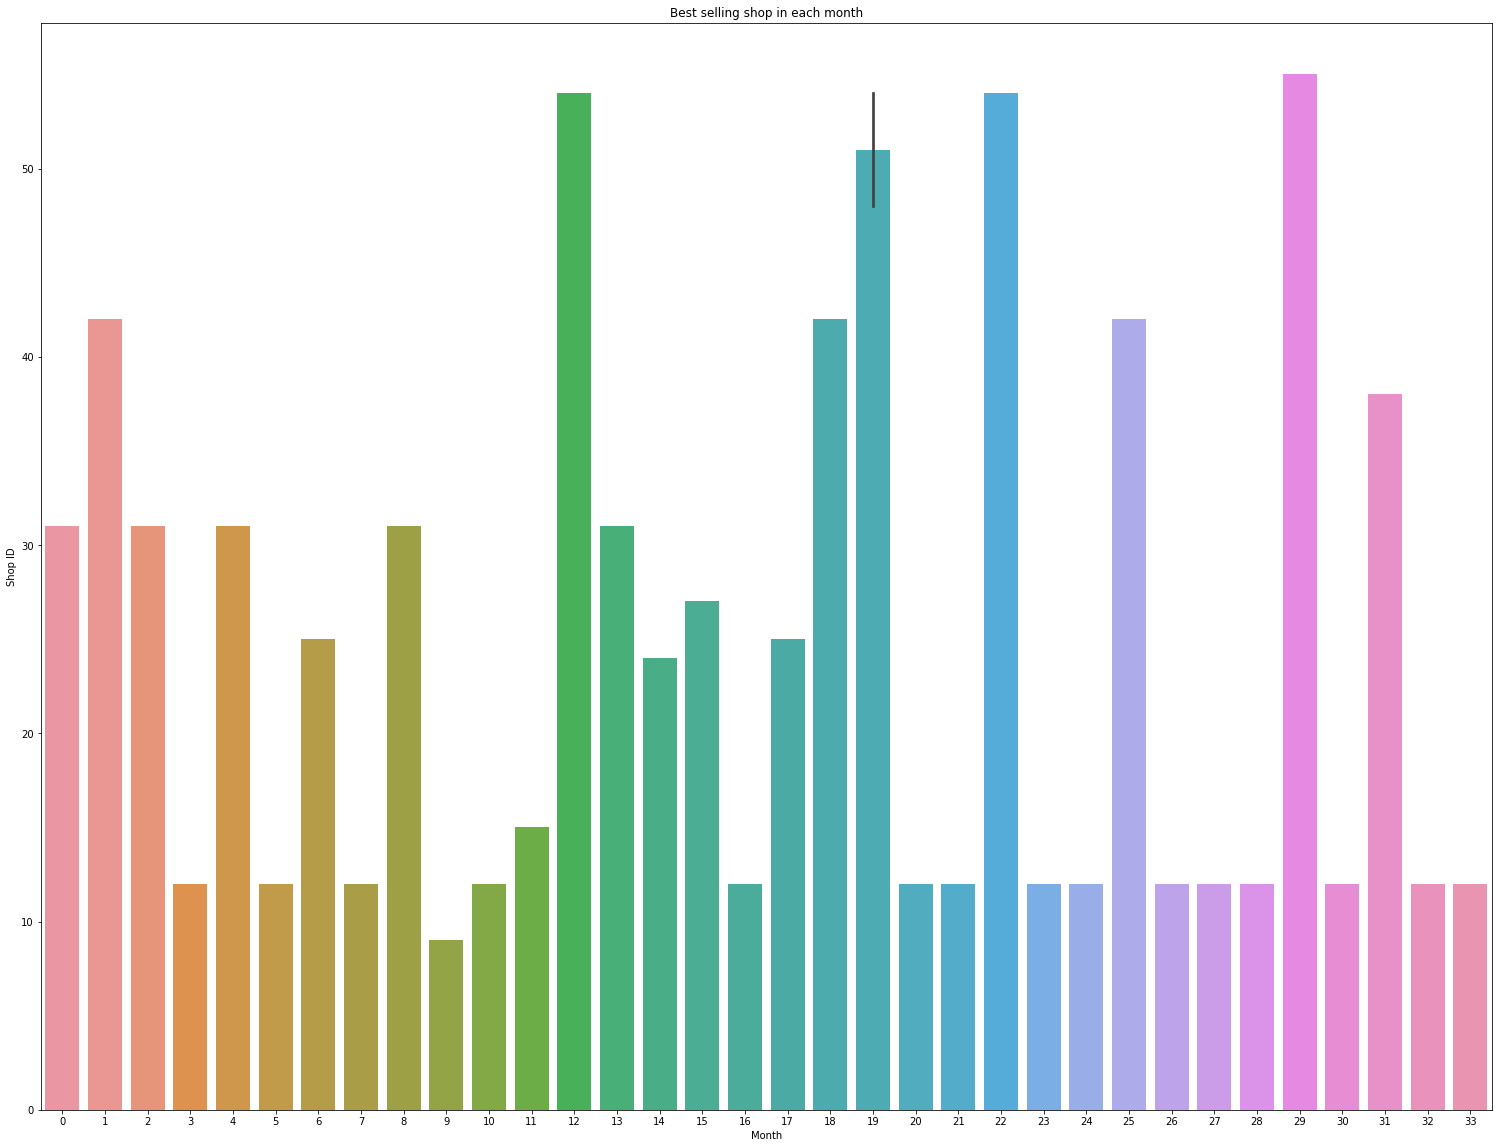

In [118]:
fig, ax = plt.subplots(figsize =(26, 20))
ax=sns.barplot(y=df_m2['shop_id'],x=df_m2['date_block_num'])
plt.title('Best selling shop in each month')
plt.xlabel("Month")
plt.ylabel("Shop ID")
plt.show()

Observation 3 : The shop with ID 12 had the best sales in 13 out of the 34 months.

---

In [135]:
sales_train.dtypes

date               object
date_block_num      int64
shop_id             int64
item_id             int64
item_price        float64
item_cnt_day      float64
dtype: object

In [138]:
df_price = sales_train
df_price["revenue"] = df_price["item_price"]*df_price["item_cnt_day"]
df_price.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,revenue
0,02.01.2013,0,59,22154,999.00,1.0,999.00
1,03.01.2013,0,25,2552,899.00,1.0,899.00
2,05.01.2013,0,25,2552,899.00,0.0,0.00
3,06.01.2013,0,25,2554,1709.05,1.0,1709.05
4,15.01.2013,0,25,2555,1099.00,1.0,1099.00


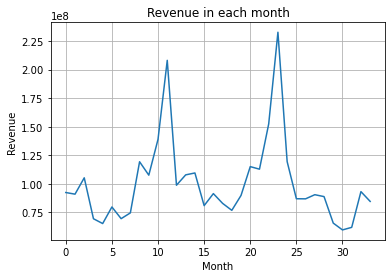

In [140]:
df_price2=df_price.groupby('date_block_num').agg(price=('revenue', 'sum'))
plt.grid("white")
plot1 = plt.plot(df_price2)
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.title("Revenue in each month")
plt.show()

Observation 4 : The month with the highest revenue was December, 2014 followed by December, 2013 even though there were more sales in December of 2013 which means the items bought in December, 2014 were more expensive. 

---

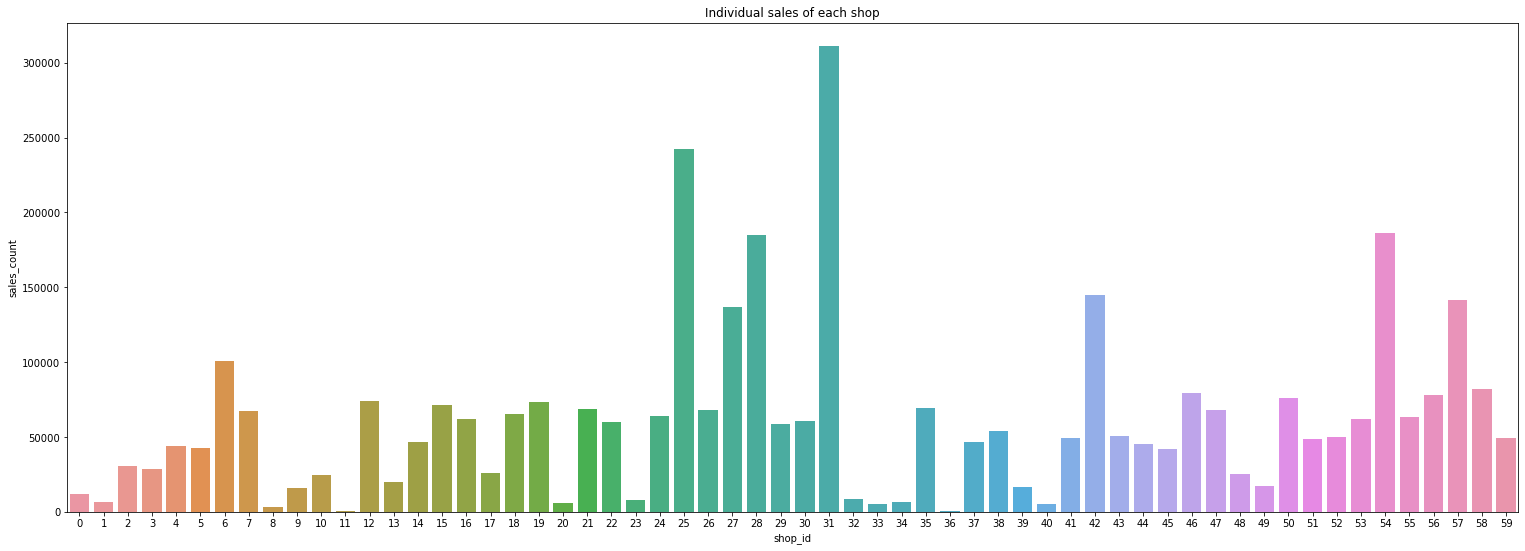

In [69]:
df_shops = df_cat.groupby('shop_id').agg(sales_count=('item_cnt_day','sum')).reset_index()
fig, ax = plt.subplots(figsize =(26, 9))
ax=sns.barplot(x=df_shops['shop_id'],y=df_shops['sales_count'])
plt.title('Individual sales of each shop')
plt.show()

Observation 5 : Shops with IDs 31, 25, and 54 are the top 3 best selling shops overall. 
Also, the best selling shop in 13 out of the 34 months i.e shop 12 is not in the top 3 best selling shops overall.

---